In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]

### Building the CNN

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [3]:
# Detecting whether keras API using GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Initializing the CNN

In [30]:
# We generally start with 32 feature detectors/filters since some use CPUs
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size= (3,3), kernel_initializer=tf.keras.initializers.he_uniform, input_shape = (64,64,3), activation = tf.keras.activations.relu, padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Conv2D(filters=64, kernel_size= (3,3), kernel_initializer=tf.keras.initializers.he_uniform, activation = tf.keras.activations.relu, padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Conv2D(filters=128, kernel_size= (3,3), kernel_initializer=tf.keras.initializers.he_uniform, activation = tf.keras.activations.relu, padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128,kernel_initializer=tf.keras.initializers.he_uniform, activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.sigmoid)])

In [100]:
'''# We generally start with 32 feature detectors/filters since some use CPUs
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size= (3,3), kernel_initializer= 'uniform', input_shape = (64,64,3), activation = 'relu', padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Conv2D(filters=64, kernel_size= (3,3), kernel_initializer= 'uniform', activation = 'relu', padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Conv2D(filters=128, kernel_size= (3,3), kernel_initializer= 'uniform', activation = 'relu', padding = 'same'),
                             tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides = 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128,kernel_initializer= 'uniform', activation = 'relu'),
                             tf.keras.layers.Dense(units = 1, activation = 'softmax')])'''

In [4]:
'''model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (64,64,3)),
                             tf.keras.layers.Dense(units = 128,kernel_initializer=tf.keras.initializers.he_uniform, activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(units = 1)])'''

In [31]:
# Compiling the CNN
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics = ['accuracy'])

In [32]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'D:\Anaconda Projects\Datasets\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 2 - Convolutional Neural Networks (CNN)\Section 8 - Building a CNN\Part 2 - Convolutional Neural Networks\dataset\training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        r'D:\Anaconda Projects\Datasets\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 2 - Convolutional Neural Networks (CNN)\Section 8 - Building a CNN\Part 2 - Convolutional Neural Networks\dataset\test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

history = model.fit(
        train_generator,
        steps_per_epoch=250,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=62)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 29s 113ms/step - loss: 0.6661 - accuracy: 0.5930 - val_loss: 0.6116 - val_accuracy: 0.6784
Epoch 2/25
250/250 [==============================] - 31s 123ms/step - loss: 0.5925 - accuracy: 0.6815 - val_loss: 0.5667 - val_accuracy: 0.7152
Epoch 3/25
250/250 [==============================] - 30s 118ms/step - loss: 0.5607 - accuracy: 0.7120 - val_loss: 0.5372 - val_accuracy: 0.7253
Epoch 4/25
250/250 [==============================] - 30s 118ms/step - loss: 0.5269 - accuracy: 0.7389 - val_loss: 0.4812 - val_accuracy: 0.7732
Epoch 5/25
250/250 [==============================] - 30s 120ms/step - loss: 0.4975 - accuracy: 0.7546 - val_loss: 0.4732 - val_accuracy: 0.7792
Epoch 6/25
250/250 [==============================] - 30s 120ms/step - loss: 0.4733 - accuracy: 0.7734 - val_loss: 0.4947 - val_accuracy: 0.7626
Epoch 7/25
250/250 [==========================

In [33]:
# Important Step
# To make sure that you have "at least steps_per_epoch * epochs batches"
steps_per_epoch = 8000//32 # Atleast len(X_train)//batch_size
validation_steps = 2000//32 # Atleast len(X_test)//batch_size
steps_per_epoch,validation_steps

(250, 62)

In [34]:
test_image = tf.keras.utils.load_img(r'D:\Anaconda Projects\Datasets\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 2 - Convolutional Neural Networks (CNN)\Section 8 - Building a CNN\Part 2 - Convolutional Neural Networks\dataset\single_prediction\cat_or_dog_1.jpg', target_size = (64,64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
print(model.predict(test_image)>0.5) # Its a dog!!

1/1 [==============================] - 0s 259ms/step
[[ True]]


In [35]:
test_image1 = tf.keras.utils.load_img(r'D:\Anaconda Projects\Datasets\Deep_Learning_A_Z\Volume 1 - Supervised Deep Learning\Part 2 - Convolutional Neural Networks (CNN)\Section 8 - Building a CNN\Part 2 - Convolutional Neural Networks\dataset\single_prediction\cat_or_dog_2.jpg', target_size = (64,64))
test_image1 = tf.keras.utils.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
print(model.predict(test_image1)>0.5) # Its a cat!!

1/1 [==============================] - 0s 16ms/step
[[False]]


In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

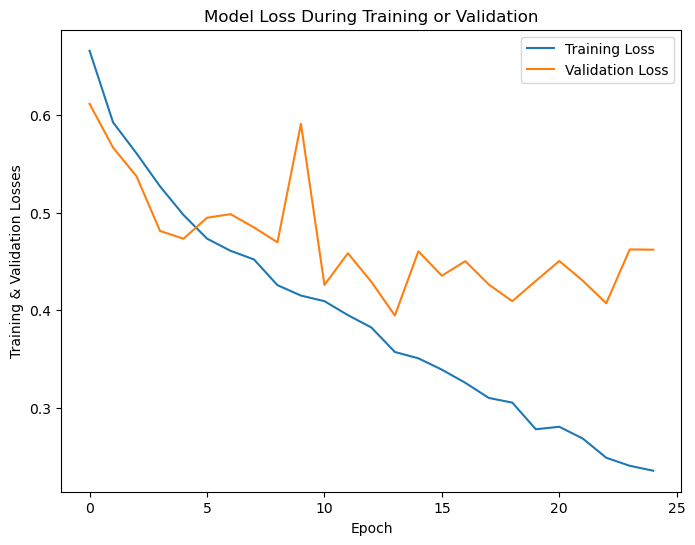

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])